In [ ]:
!pip install neurokit2

In [57]:
import neurokit2 as nk
import numpy as np
from scipy.fft import fft, fftfreq
from scipy import signal
import matplotlib.pyplot as plt

In [197]:
ecgOr = nk.ecg_simulate(duration=8, sampling_rate=250, method="daubechies")

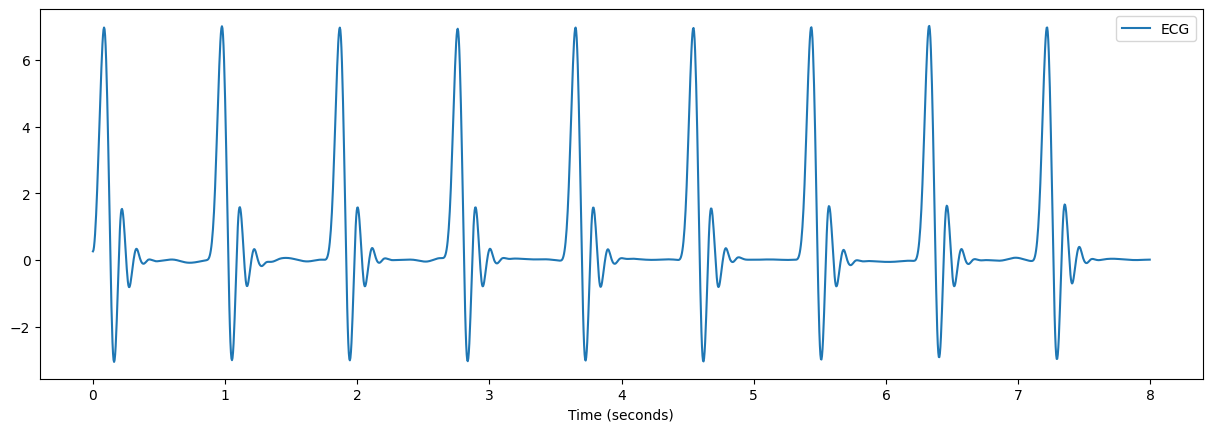

In [198]:
nk.signal_plot(ecgOr, sampling_rate=250, labels="ECG")
plt.gcf().set_figwidth(15)

In [199]:
ecg = ecgOr - ecgOr.mean()
ecg = ecg / ecg.max()

In [206]:
yf = fft(ecg)
xf = fftfreq(ecg.size, d = 1/250)[: ecg.size//2]
yfplot = 2.0 / ecg.size * np.abs(yf[0:ecg.size//2])

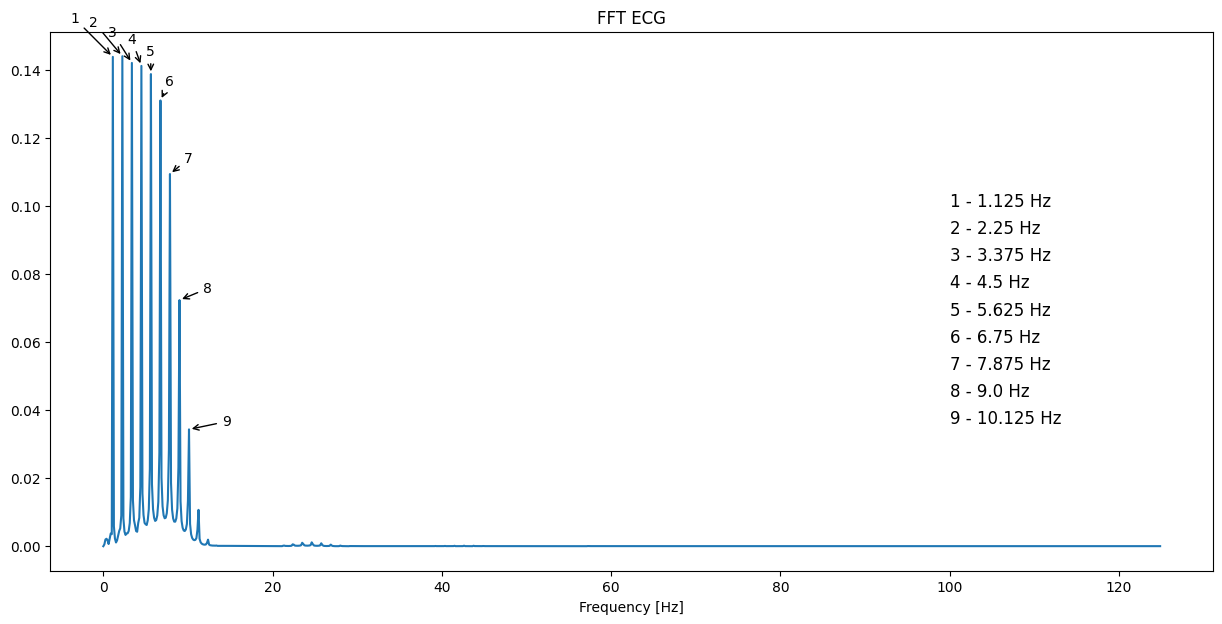

In [210]:
plt.figure(figsize=(15,7))
plt.plot(xf, yfplot)
plt.xlabel('Frequency [Hz]')
plt.title('FFT ECG')
peaks = signal.find_peaks(yfplot, prominence=0.01)[0]
#plt.scatter(xf[peaks], yfplot[peaks], color='r', marker='v')
ydistance = np.linspace(0.1, 0, 10) / 10
xdistance = np.linspace(-5, 5, 10)
for idx, peak in enumerate(peaks):
    plt.annotate(f'{idx + 1}', xy=(xf[peak], yfplot[peak]),
                 xytext = (xf[peak] + xdistance[idx], yfplot[peak] + ydistance[idx]),
                 arrowprops=dict(arrowstyle="->", facecolor='black'))
    plt.text(100, 0.1 - 0.008 * idx, f"{idx + 1} - {xf[peak]} Hz", fontsize=12)

In [226]:
noise = np.random.normal(-5,5, ecg.shape)

In [234]:
ecgNoiseOr = ecgOr+noise

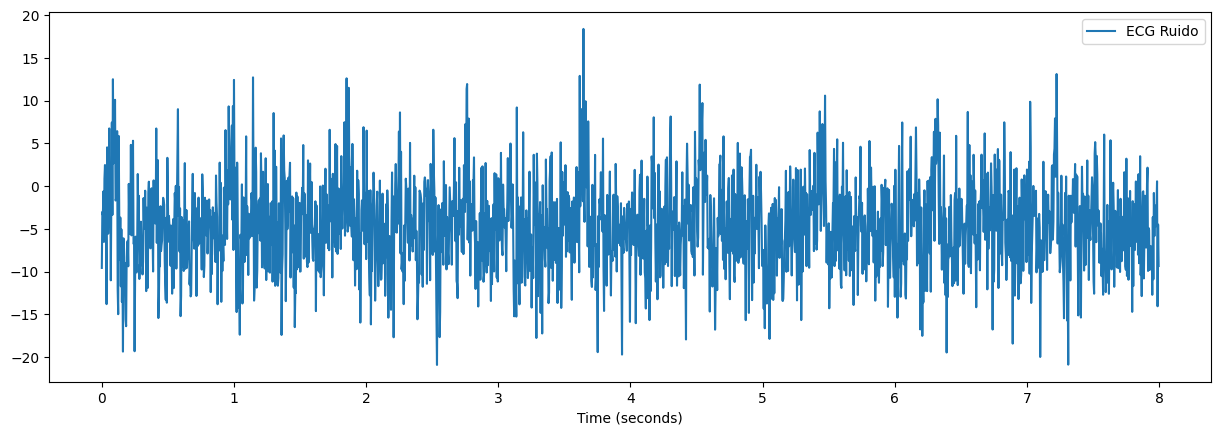

In [235]:
nk.signal_plot(ecgNoiseOr, sampling_rate=250, labels="ECG Ruido")
plt.gcf().set_figwidth(15)

In [236]:
ecgNoise = ecgNoiseOr - ecgNoiseOr.mean()
ecgNoise = ecgNoise / ecgNoise.max()

In [237]:
yfNoise = fft(ecgNoise)
xfNoise = fftfreq(ecgNoise.size, d = 1/250)[: ecgNoise.size//2]
yfplotNoise = 2.0 / ecgNoise.size * np.abs(yfNoise[0:ecgNoise.size//2])

Text(0.5, 1.0, 'FFT ECG Noise')

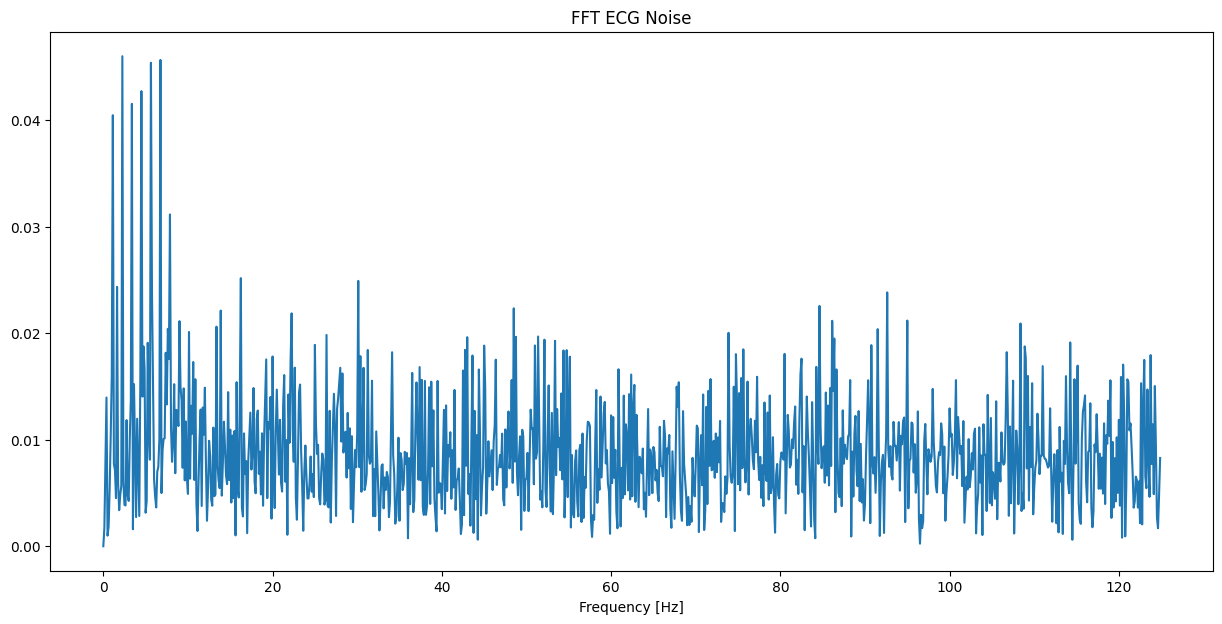

In [238]:
plt.figure(figsize=(15,7))
plt.plot(xfNoise, yfplotNoise)
plt.xlabel('Frequency [Hz]')
plt.title('FFT ECG Noise')

In [239]:
ecgNoiseCorr = signal.correlate(ecgNoise, ecgNoise)
ecgNoiseCorr /= np.max(ecgNoiseCorr)

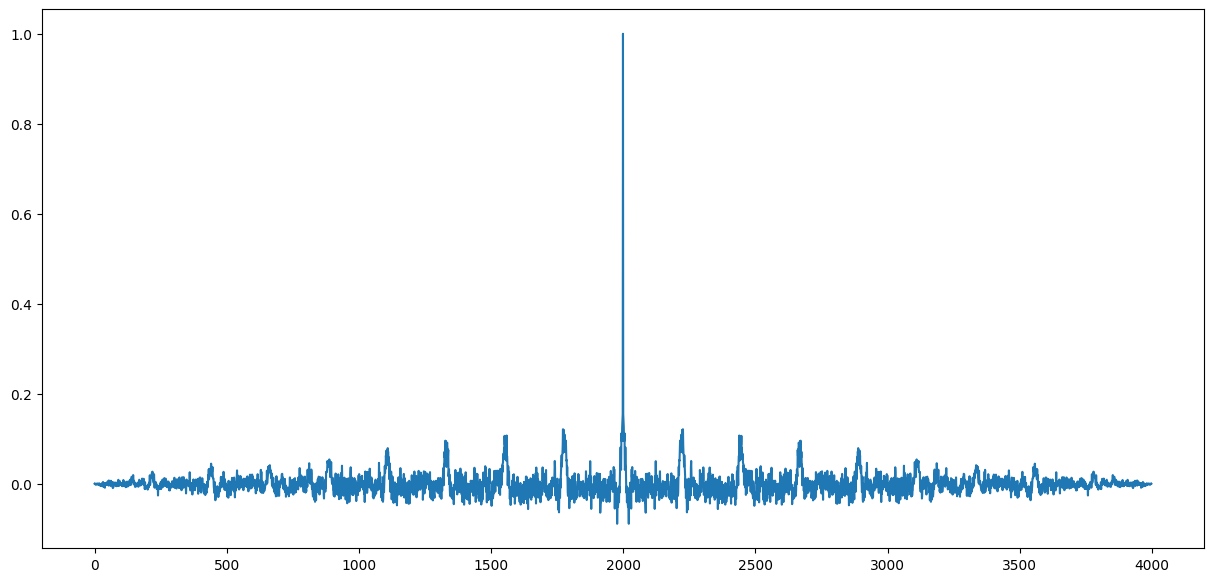

In [240]:
plt.figure(figsize=(15,7))
plt.plot(ecgNoiseCorr)

In [245]:
yfNoiseC = fft(ecgNoiseCorr)
xfNoiseC = fftfreq(ecgNoiseCorr.size, d = 1/250)[: ecgNoiseCorr.size//2]
yfplotNoiseC = 2.0 / ecgNoiseCorr.size * np.abs(yfNoise[0:ecgNoiseCorr.size//2])
yfplotNoiseC /= yfplotNoiseC.max()
yfplotNoiseC **= 2

Text(0.5, 1.0, 'FFT ECG Noise Corr')

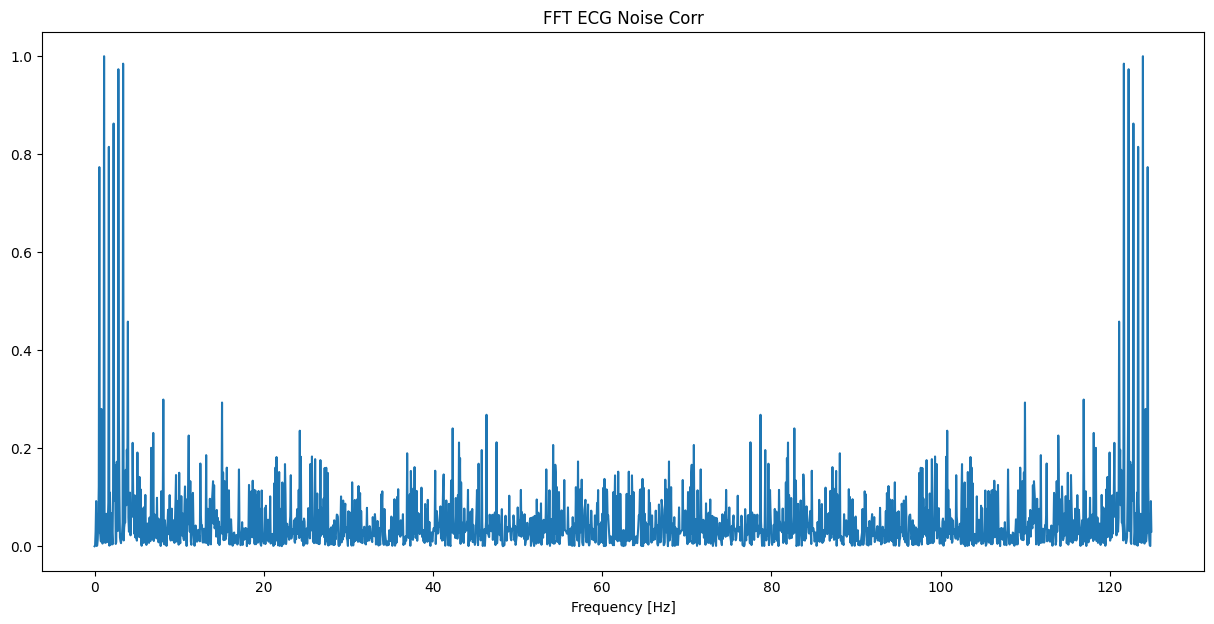

In [246]:
plt.figure(figsize=(15,7))
plt.plot(xfNoiseC, yfplotNoiseC)
plt.xlabel('Frequency [Hz]')
plt.title('FFT ECG Noise Corr')